## Debug isi file GRIB

Sebelum ambil datanya, coba lihat dulu isi GRIB dengan cfgrib:

In [1]:
import cfgrib

# Periksa semua message group di file
print(cfgrib.open_datasets("aifs-solar-radiation-2025-09-06.grib2"))

/home/prema/miniconda3/envs/notebooks/lib/python3.13/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode the variable 'step' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


[<xarray.Dataset> Size: 253MB
Dimensions:     (step: 61, latitude: 721, longitude: 1440)
Coordinates:
    time        datetime64[ns] 8B 2025-09-05
  * step        (step) timedelta64[ns] 488B 0 days 00:00:00 ... 15 days 00:00:00
    surface     float64 8B 0.0
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    valid_time  (step) datetime64[ns] 488B ...
Data variables:
    ssrd        (step, latitude, longitude) float32 253MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts]


# 1. Proses data ke CSV

In [2]:
import metview as mv

data = mv.read("aifs-solar-radiation-2025-09-06.grib2")
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
ssrd,surface,0,20250905,0,"0,6,...",None,169,ai,oper,fc,0001


In [3]:
data.describe('ssrd')

shortName,ssrd
name,Surface short-wave (solar) radiation downwards
paramId,169
units,J m**-2
typeOfLevel,surface
level,0
date,20250905
time,0
step,"0,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90,96,102,108,114,120,126,132,138,144,150,156,162,168,174,180,186,192,198,204,210,216,222,228,234,240,246,252,258,264,270,276,282,288,294,300,306,312,318,324,330,336,342,348,354,360"
number,None
class,ai


In [4]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,ssrd,surface,0,20250905,0,0,fc,None,regular_ll
1,ecmf,ssrd,surface,0,20250905,0,0-6,fc,None,regular_ll
2,ecmf,ssrd,surface,0,20250905,0,0-12,fc,None,regular_ll
3,ecmf,ssrd,surface,0,20250905,0,0-18,fc,None,regular_ll
4,ecmf,ssrd,surface,0,20250905,0,0-24,fc,None,regular_ll
5,ecmf,ssrd,surface,0,20250905,0,0-30,fc,None,regular_ll
6,ecmf,ssrd,surface,0,20250905,0,0-36,fc,None,regular_ll
7,ecmf,ssrd,surface,0,20250905,0,0-42,fc,None,regular_ll
8,ecmf,ssrd,surface,0,20250905,0,0-48,fc,None,regular_ll


We can see that we have both parameters at steps 12 and 24.  

If we want to plot the total precipitation between steps 12 and 24 UTC, we need the data on both timesteps because total precipitation is parameter that is accumulated from the start of the forecast period. This means that step 12 has all accumulated precipitation from start of the forecast (00UTC) until 12 UTC, step 24 has accumulation from 00 to 24 UTC and so on.  
If we want the precipitation from 12 to 24 we need to deaccumulate it, by simply substracting.  
We will use the **select()** function to filter the total precipitation at different steps.

<!-- # Surface short-wave (solar) radiation downwards
ssrd_6 = data.select(shortName='ssrd', step= 6)
ssrd_12 = data.select(shortName='ssrd', step= 12)
ssrd = (ssrd_6 - ssrd_12)
ssrd.ls() -->

In [8]:
ssrd_12 = data.select(shortName='ssrd', step=12)
ssrd_6 = data.select(shortName='ssrd', step=6)
ssrd = (ssrd_12 - ssrd_6)
ssrd.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,ssrd,surface,0,20250905,0,0-12,fc,None,regular_ll


In [11]:
print("Step 6 min/max:", ssrd_6.minvalue(), ssrd_6.maxvalue())
print("Step 12 min/max:", ssrd_12.minvalue(), ssrd_12.maxvalue())
print("Difference min/max:", ssrd.minvalue(), ssrd.maxvalue())

Step 6 min/max: 0.0 19575808.0
Step 12 min/max: 0.0 28619264.0
Difference min/max: 0.0 20000768.0


In [15]:
print("Mean difference:", ssrd.mean().values())
print("Sample values:", ssrd.values()[0:10])

Mean difference: [905728. 905728. 905728. ...      0.      0.      0.]
Sample values: [905728. 905728. 905728. 905728. 905728. 905728. 905728. 905728. 905728.
 905728.]


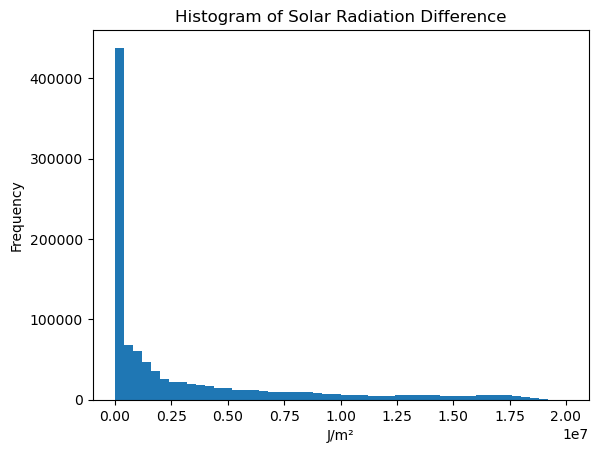

In [16]:
import matplotlib.pyplot as plt
plt.hist(ssrd.values(), bins=50)
plt.title("Histogram of Solar Radiation Difference")
plt.xlabel("J/m²")
plt.ylabel("Frequency")
plt.show()

In [17]:
print("Array size:", ssrd_array.size)
# Try common grid shapes
possible_shapes = [(721, 1440), (1440, 721), (360, 720), (720, 360)]
for shape in possible_shapes:
    if np.prod(shape) == ssrd_array.size:
        print("Possible grid shape:", shape)
        break

Array size: 1038240
Possible grid shape: (721, 1440)


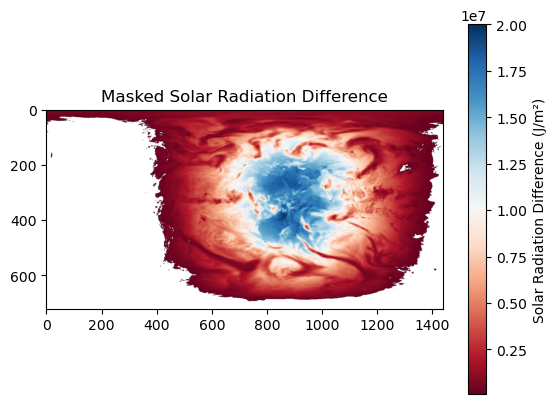

In [18]:
import numpy as np
# Convert Metview fieldset to numpy array
ssrd_array = np.array(ssrd.values())
# Mask low values
ssrd_masked = np.where(ssrd_array < 100000, np.nan, ssrd_array)
# Try to infer grid shape (Metview fields are usually 2D, e.g., (lat, lon))
# If you know the shape, set it directly, e.g., (721, 1440)
plt.imshow(ssrd_masked.reshape(721, 1440), cmap='RdBu')
plt.colorbar(label="Solar Radiation Difference (J/m²)")
plt.title("Masked Solar Radiation Difference")
plt.show()

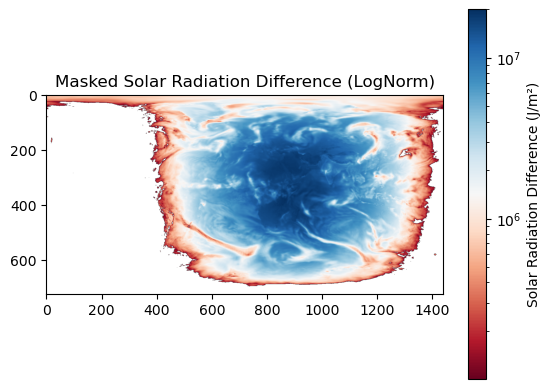

In [22]:
import matplotlib.colors as mcolors

# Use LogNorm for color normalization
plt.imshow(ssrd_masked.reshape(721, 1440), cmap='RdBu', norm=mcolors.LogNorm(vmin=np.nanmin(ssrd_masked[ssrd_masked>0]), vmax=np.nanmax(ssrd_masked)))
plt.colorbar(label="Solar Radiation Difference (J/m²)")
plt.title("Masked Solar Radiation Difference (LogNorm)")
plt.show()

## Plotting the data
And finally, we can plot the data on the map. 

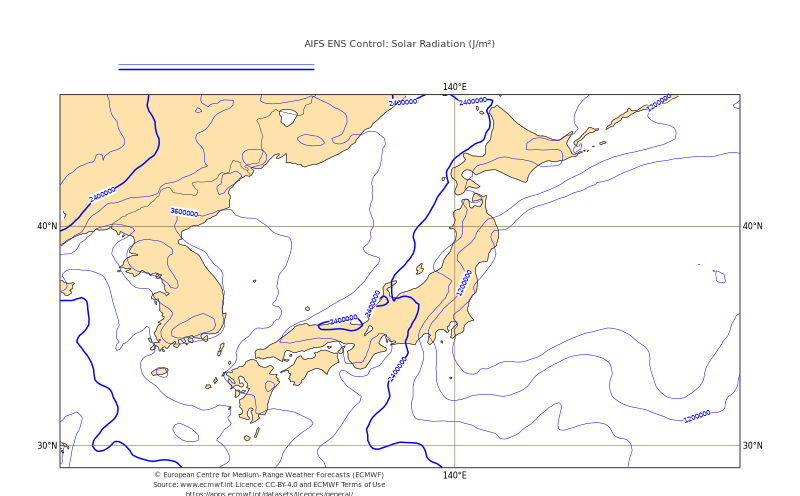

In [21]:
# define coastlines
coast = mv.mcoast(
    map_coastline_colour="charcoal",
    map_coastline_resolution="medium",
    map_coastline_land_shade="on",
    map_coastline_land_shade_colour="cream",
    map_coastline_sea_shade="off",
    map_boundaries="on",
    map_boundaries_colour= "charcoal",
    map_boundaries_thickness = 1,
    map_disputed_boundaries = "off",
    map_grid_colour="tan",
    map_label_height=0.35,
)

# define japan area [S,W,N,E]
japan_area = [29, 122, 46, 153]

# define view
view = mv.geoview(
    area = japan_area,
    coastlines=coast
)

#define styles
ssrd_shade = mv.mcont(legend= "on",
                contour_automatics_settings = "style_name",
                contour_style_name = "sh_red_blue")

title = mv.mtext(
    text_lines = ["AIFS ENS Control: Solar Radiation (J/m²)",
                "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=msl' /> ",
                "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=msl' />, STEP: <grib_info key='step' where='shortName=msl' />"],
    text_font_size=0.4,
    text_colour         = 'charcoal')

ecmwf_text = mv.mtext(    
    text_lines          = ["© European Centre for Medium-Range Weather Forecasts (ECMWF)",
                           "Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use",
                           "https://apps.ecmwf.int/datasets/licences/general/"],
    text_justification  = 'center',
    text_font_size      = 0.3,
    text_mode           = "positional",
    text_box_x_position = 6.,
    text_box_y_position = -0.2,
    text_box_x_length   = 8,
    text_box_y_length   = 2,
    text_colour         = 'charcoal')

# generate plot
mv.setoutput('jupyter', plot_widget=False)
mv.plot(view, ssrd, ssrd_shade, title, ecmwf_text)